(sec:pandas10min_2)=
# 판다스 10분 완성 2부


**필수 라이브러리**

In [1]:
import numpy as np
import pandas as pd

## 데이터 결합: merge-join-concat

- 참고: [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging)

### 합종연횡: `pd.concat()` 함수

`pd.concat()` 함수는 여러 개의 데이터프레임을 하나로 합친다.

- `axis=0`: 합종 결합

In [2]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [3]:
df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)

df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [4]:
df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11],
)

df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [5]:
pd.concat([df1, df2, df3]) # axis=0 이 기본값

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


- `axis=1`: 연횡 결합

In [6]:
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)

df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [7]:
pd.concat([df1, df4], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [8]:
df1.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [9]:
pd.concat([df1, df4], axis=1).reindex(df1.index)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [10]:
df4.reindex(df1.index)

,B,D,F
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,B2,D2,F2
3,B3,D3,F3


In [11]:
pd.concat([df1, df4.reindex(df1.index)], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


### 합병: `pd.merge()` 함수

`pd.merge()` 함수 는 SQL 방식으로 특정 열을 기준으로 두 개의 데이터프레임을 합친다.
다양한 옵션을 지원하는 매우 강력한 도구이다.

- 참고: [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join)

**예제**

실습을 위해 아래 두 데이터프레임을 이용한다.

In [12]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [13]:
left

,key,lval
0,foo,1
1,foo,2


In [14]:
right

,key,rval
0,foo,4
1,foo,5


- `on="key"` 키워드 인자
    - `key` 열에 사용된 항목 각각에 대해 다른 열에서 해당 항목과 연관된 값들을 조합할 수 있는 모든 경우의 수를 다룬다.
    - `foo` 값에 대해 `lval` 열에서 2개의 값이,
        `rval` 열에서 2개의 값이 있기에 `foo`와 관련해서 총 4개의 경우가 생성된다.
    <br><br>
    
    | `key` | `left.lval` | `right.rval` | 경우의 수 |
    | :---: | :---: | :---: | :---: |
    | `foo` | `1, 2` | `4, 5` | 4 |

In [15]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


**예제**

In [16]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [17]:
left

,key,lval
0,foo,1
1,bar,2


In [18]:
right

,key,rval
0,foo,4
1,bar,5


- `on="key"` 키워드 인자
    - `key` 열에 사용된 항목별로 모든 경우의 수를 다룬다.
    - `foo` 값에 대해 `lval` 열에서 1개의 값이,
        `rval` 열에서 1개의 값이 있기에 `foo`와 관련해서 총 1개의 경우가 생성된다.
    - `bar` 값에 대해 `lval` 열에서 1개의 값이,
        `rval` 열에서 1개의 값이 있기에 `foo`와 관련해서 총 1개의 경우가 생성된다.
    <br><br>
    
    | `key` | `left.lval` | `right.rval` | 경우의 수 |
    | :---: | :---: | :---: | :---: |
    | `foo` | `1` | `4` | 1 |        
    | `bar` | `2` | `5` | 1 |        

In [19]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


**예제**

경우의 수는 지정된 열의 항목이 사용된 횟수를 기준으로 한다. 

In [20]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

In [21]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [22]:
right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [23]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


| `key` | (`left.A`, `left.B`) | (`right.C`, `right.D`) | 경우의 수 |
| :---: | :---: | :---: | :---: |
| `K0` | (`A0`, `B0`) | (`C0`, `D0`) | 1 |
| `K1` | (`A1`, `B1`) | (`C1`, `D1`) | 1 |
| `K2` | (`A2`, `B2`) | (`C2`, `D2`) | 1 |
| `K3` | (`A3`, `B3`) | (`C3`, `D3`) | 1 |

In [24]:
result = pd.merge(left, right, on="key")
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


**다양한 키워드 인자**

In [25]:
left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [26]:
right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


- `how='inner'`: 지정된 키의 교집합 대상

In [27]:
result = pd.merge(left, right, on=["key1", "key2"]) # how='inner' 가 기본값
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [28]:
result = pd.merge(left, right, how="inner", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


- `how='outer'`: 지정된 키의 합집합 대상

In [29]:
result = pd.merge(left, right, how="outer", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


- `how='left'`: 왼쪽 데이터프레임의 키에 포함된 항목만 대상

In [30]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [31]:
result = pd.merge(left, right, how="left", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


- `how='right'`: 오른쪽 데이터프레임의 키에 포함된 항목만 대상

In [32]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [33]:
result = pd.merge(left, right, how="right", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


- `how='cross'`: 모든 경우의 수 조합

In [34]:
result = pd.merge(left, right, how="cross")
result

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,K0,K0,C0,D0
9,K1,K0,A2,B2,K1,K0,C1,D1


### 합병: `DataFrame.join()` 메서드

인덱스를 기준으로 두 개의 데이터프레임을 합병할 때 사용한다.

In [35]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)

left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [36]:
right = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)

right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [37]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


아래와 같이 `pd.merge()` 함수를 이용한 결과와 동일하다.

In [38]:
pd.merge(left, right, left_index=True, right_index=True, how='left')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


`pd.merge()` 함수의 키워드 인자를 동일하게 사용할 수 있다.

- `how='outer'`

In [39]:
left.join(right, how="outer")

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


아래 코드가 동일한 결과를 낸다.

In [40]:
pd.merge(left, right, left_index=True, right_index=True, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


- `how='inner'`

In [41]:
left.join(right, how="inner")

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


아래 코드가 동일한 결과를 낸다.

In [42]:
pd.merge(left, right, left_index=True, right_index=True, how='inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


## 그룹화: `pd.groupby()` 함수

- 참고: [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby)

`pd.groupby()` 함수는 다음 3 기능을 제공한다.

- **분류**<font size='2'>Splitting</font>: 데이터를 조건에 따라 여러 그룹으로 분류
- **함수 적용**<font size='2'>Applying</font>: 그룹별로 함수 적용
- **조합**<font size='2'>Combining</font>: 그룹별 함수 적용 결과를 취합하여 새로운 데이터프레임/시리즈 생성

In [43]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

df

,A,B,C,D
0,foo,one,1.018430,-0.878762
1,bar,one,1.403329,0.089246
2,foo,two,0.557203,-0.537264
3,bar,three,0.182007,0.209080
4,foo,two,-0.964830,-3.269280
5,bar,two,0.178022,0.920202
6,foo,one,1.275186,-0.279709
7,bar,three,0.715051,0.863761


- `A` 열에 사용된 항목 기준으로 그룹으로 분류한 후 그룹별로 `C`와 `D` 열의 모든 항목의 합 계산해서 새로운 데이터프레임 생성
    <br><br>
    
    | `A` | 경우의 수 |
    | :---: | :---: |
    | `bar` | 1 |
    | `foo` | 1 |

In [44]:
df.groupby('A')[["C", "D"]].sum()

,C,D
A,,
bar,2.478409,2.082289
foo,1.885988,-4.965015


- `A`열의 항목과 `B` 열의 항목의 조합을 기준으로 그룹으로 그룹별로 `C`와 `D` 열의 모든 항목의 합 계산해서 새로운 데이터프레임 생성
    <br><br>
    
    | `A` | `B` | 경우의 수 |
    | :---: | :---: | :---: |
    | `bar` | `one`, `three`, `two` | 3 |
    | `foo` | `one`, `two` | 2 |

In [45]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    1.403329  0.089246
    three  0.897058  1.072840
    two    0.178022  0.920202
foo one    2.293616 -1.158471
    two   -0.407627 -3.806544

**그룹 확인**

- `for` 반복문 활용 

In [46]:
for name, group in df.groupby(["A", "B"]):
    print(name)
    print(group)

('bar', 'one')
     A    B         C         D
1  bar  one  1.403329  0.089246
('bar', 'three')
     A      B         C         D
3  bar  three  0.182007  0.209080
7  bar  three  0.715051  0.863761
('bar', 'two')
     A    B         C         D
5  bar  two  0.178022  0.920202
('foo', 'one')
     A    B         C         D
0  foo  one  1.018430 -0.878762
6  foo  one  1.275186 -0.279709
('foo', 'two')
     A    B         C         D
2  foo  two  0.557203 -0.537264
4  foo  two -0.964830 -3.269280


- `get_group()` 메서드

In [47]:
df.groupby(["A", "B"]).get_group(('bar', 'one'))

,A,B,C,D
1,bar,one,1.403329,0.089246


In [48]:
df.groupby(["A", "B"]).get_group(('bar', 'three'))

,A,B,C,D
3,bar,three,0.182007,0.209080
7,bar,three,0.715051,0.863761


- `groups` 속성

In [49]:
df.groupby(["A", "B"]).groups

{('bar', 'one'): [1], ('bar', 'three'): [3, 7], ('bar', 'two'): [5], ('foo', 'one'): [0, 6], ('foo', 'two'): [2, 4]}

- `value_counts` 속성

In [50]:
df.groupby(["A", "B"]).value_counts()

A    B      C          D        
bar  one     1.403329   0.089246    1
     three   0.182007   0.209080    1
             0.715051   0.863761    1
     two     0.178022   0.920202    1
foo  one     1.018430  -0.878762    1
             1.275186  -0.279709    1
     two    -0.964830  -3.269280    1
             0.557203  -0.537264    1
dtype: int64

- `nunique` 속성

In [51]:
df.groupby(["A", "B"]).nunique()

C  D
A   B          
bar one    1  1
    three  2  2
    two    1  1
foo one    2  2
    two    2  2

- `sort=True` 키워드 인자

In [52]:
df.groupby(["A", "B"], sort=True).sum()

C         D
A   B                        
bar one    1.403329  0.089246
    three  0.897058  1.072840
    two    0.178022  0.920202
foo one    2.293616 -1.158471
    two   -0.407627 -3.806544

In [53]:
df.groupby(["A", "B"], sort=False).sum()

C         D
A   B                        
foo one    2.293616 -1.158471
bar one    1.403329  0.089246
foo two   -0.407627 -3.806544
bar three  0.897058  1.072840
    two    0.178022  0.920202

In [54]:
df.groupby(["A", "B"], sort=False).nunique()

C  D
A   B          
foo one    2  2
bar one    1  1
foo two    2  2
bar three  2  2
    two    1  1

**그룹 연산**

In [55]:
df.groupby('A')[["C", "D"]].max()

,C,D
A,,
bar,1.403329,0.920202
foo,1.275186,-0.279709


In [56]:
df.groupby(["A", "B"]).max()

C         D
A   B                        
bar one    1.403329  0.089246
    three  0.715051  0.863761
    two    0.178022  0.920202
foo one    1.275186 -0.279709
    two    0.557203 -0.537264

In [57]:
df.groupby('A')[["C", "D"]].mean()

,C,D
A,,
bar,0.619602,0.520572
foo,0.471497,-1.241254


In [58]:
df.groupby(["A", "B"]).mean()

C         D
A   B                        
bar one    1.403329  0.089246
    three  0.448529  0.536420
    two    0.178022  0.920202
foo one    1.146808 -0.579235
    two   -0.203814 -1.903272

In [59]:
df.groupby('A')[["C", "D"]].size()

A
bar    4
foo    4
dtype: int64

In [60]:
df.groupby(["A", "B"]).size()

A    B    
bar  one      1
     three    2
     two      1
foo  one      2
     two      2
dtype: int64

In [61]:
df.groupby('A')[["C", "D"]].describe()

C                                                              \
    count      mean       std       min       25%       50%       75%   
A                                                                       
bar   4.0  0.619602  0.580178  0.178022  0.181011  0.448529  0.887120   
foo   4.0  0.471497  1.002569 -0.964830  0.176694  0.787816  1.082619   

                  D                                                    \
          max count      mean       std       min       25%       50%   
A                                                                       
bar  1.403329   4.0  0.520572  0.432262  0.089246  0.179121  0.536420   
foo  1.275186   4.0 -1.241254  1.374101 -3.269280 -1.476392 -0.708013   

                         
          75%       max  
A                        
bar  0.877871  0.920202  
foo -0.472875 -0.279709

In [62]:
df.groupby(["A", "B"]).describe()

C                                                              \
          count      mean       std       min       25%       50%       75%   
A   B                                                                         
bar one     1.0  1.403329       NaN  1.403329  1.403329  1.403329  1.403329   
    three   2.0  0.448529  0.376919  0.182007  0.315268  0.448529  0.581790   
    two     1.0  0.178022       NaN  0.178022  0.178022  0.178022  0.178022   
foo one     2.0  1.146808  0.181554  1.018430  1.082619  1.146808  1.210997   
    two     2.0 -0.203814  1.076240 -0.964830 -0.584322 -0.203814  0.176694   

                        D                                                    \
                max count      mean       std       min       25%       50%   
A   B                                                                         
bar one    1.403329   1.0  0.089246       NaN  0.089246  0.089246  0.089246   
    three  0.715051   2.0  0.536420  0.462929  0.209080  0.372750  0.536420   
    two    0.178022   1.0  0.920202       NaN  0.920202  0.920202  0.920202   
foo one    1.275186   2.0 -0.579235  0.423595 -0.878762 -0.728999 -0.579235   
    two    0.557203   2.0 -1.903272  1.931827 -3.269280 -2.586276 -1.903272   

                               
                75%       max  
A   B                          
bar one    0.089246  0.089246  
    three  0.700090  0.863761  
    two    0.920202  0.920202  
foo one   -0.429472 -0.279709  
    two   -1.220268 -0.537264

## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [63]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)

tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [64]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [65]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one    -0.425581 -0.944740
      two    -3.037346  0.945253
baz   one     0.027429 -0.516669
      two    -0.746659  1.476995
foo   one     0.830600  1.240499
      two    -0.588938 -0.877038
qux   one     0.753042 -0.551129
      two     2.327707  1.092144

In [66]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.425581 -0.944740
      two    -3.037346  0.945253
baz   one     0.027429 -0.516669
      two    -0.746659  1.476995

The [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns:



In [67]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.425581
               B   -0.944740
       two     A   -3.037346
               B    0.945253
baz    one     A    0.027429
               B   -0.516669
       two     A   -0.746659
               B    1.476995
dtype: float64

With a “stacked” DataFrame or Series (having a [MultiIndex](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html#pandas.MultiIndex) as the `index`), the inverse operation of [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the **last level**:

In [68]:
stacked.unstack()

A         B
first second                    
bar   one    -0.425581 -0.944740
      two    -3.037346  0.945253
baz   one     0.027429 -0.516669
      two    -0.746659  1.476995

In [69]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.425581 -3.037346
      B -0.944740  0.945253
baz   A  0.027429 -0.746659
      B -0.516669  1.476995

In [70]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.425581  0.027429
       B -0.944740 -0.516669
two    A -3.037346 -0.746659
       B  0.945253  1.476995

### Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot).

In [71]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-0.871650,0.357447
1,one,B,foo,-0.130195,0.885047
2,two,C,foo,-1.225810,-0.639333
3,three,A,bar,-0.032670,1.019736
4,one,B,bar,0.036158,0.577312
5,one,C,bar,0.418529,-1.945792
6,two,A,foo,-0.177439,-0.714426
7,three,B,foo,-0.589509,0.591826
8,one,C,foo,-0.054960,-0.341115
9,one,A,bar,1.411860,0.716325


[`pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#pandas.pivot_table) pivots a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) specifying the `values`, `index`, and `columns`



In [72]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  1.411860 -0.871650
      B  0.036158 -0.130195
      C  0.418529 -0.054960
three A -0.032670       NaN
      B       NaN -0.589509
      C -1.535576       NaN
two   A       NaN -0.177439
      B -0.198047       NaN
      C       NaN -1.225810

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries) section.

In [73]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [74]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    132
2012-01-01 00:00:01     49
2012-01-01 00:00:02    158
2012-01-01 00:00:03    384
2012-01-01 00:00:04    468
                      ... 
2012-01-01 00:01:35      6
2012-01-01 00:01:36    204
2012-01-01 00:01:37    203
2012-01-01 00:01:38    275
2012-01-01 00:01:39    330
Freq: S, Length: 100, dtype: int64

In [75]:
ts.resample("10S").sum()

2012-01-01 00:00:00    2266
2012-01-01 00:00:10    2174
2012-01-01 00:00:20    2081
2012-01-01 00:00:30    2285
2012-01-01 00:00:40    1253
2012-01-01 00:00:50    3623
2012-01-01 00:01:00    1817
2012-01-01 00:01:10    2141
2012-01-01 00:01:20    2115
2012-01-01 00:01:30    2639
Freq: 10S, dtype: int64

In [76]:
ts.resample("1Min").sum()

2012-01-01 00:00:00    13682
2012-01-01 00:01:00     8712
Freq: T, dtype: int64

[`Series.tz_localize()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html#pandas.Series.tz_localize) localizes a time series to a time zone:

In [77]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts, "\n")
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06   -2.339070
2012-03-07    0.918218
2012-03-08    0.801979
2012-03-09   -1.334786
2012-03-10    2.142982
Freq: D, dtype: float64 



2012-03-06 00:00:00+00:00   -2.339070
2012-03-07 00:00:00+00:00    0.918218
2012-03-08 00:00:00+00:00    0.801979
2012-03-09 00:00:00+00:00   -1.334786
2012-03-10 00:00:00+00:00    2.142982
Freq: D, dtype: float64

Converting between time span representations:

In [78]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [79]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.486955
2012-02-29   -0.762562
2012-03-31    1.444962
2012-04-30    0.317764
2012-05-31   -0.698324
Freq: M, dtype: float64

In [80]:
ps = ts.to_period()
ps

2012-01   -0.486955
2012-02   -0.762562
2012-03    1.444962
2012-04    0.317764
2012-05   -0.698324
Freq: M, dtype: float64

In [81]:
ps.to_timestamp()

2012-01-01   -0.486955
2012-02-01   -0.762562
2012-03-01    1.444962
2012-04-01    0.317764
2012-05-01   -0.698324
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [82]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]')

In [83]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1    0.032126
1990Q2   -0.669374
1990Q3    0.878916
1990Q4   -1.700059
1991Q1    0.333281
1991Q2   -0.407602
1991Q3   -0.575172
1991Q4   -0.559229
1992Q1   -0.666365
1992Q2    1.149763
1992Q3    0.345065
1992Q4   -0.368360
1993Q1   -2.011328
1993Q2    0.691790
1993Q3    0.081577
1993Q4    0.426972
1994Q1   -0.957994
1994Q2    0.388651
1994Q3    1.342524
1994Q4   -0.342774
1995Q1    1.318346
1995Q2    1.339233
1995Q3   -0.856048
1995Q4    1.676571
1996Q1    0.309488
1996Q2    0.839987
1996Q3    1.281626
1996Q4    0.563086
1997Q1   -0.140731
1997Q2    1.578541
1997Q3    1.777640
1997Q4   -1.045217
1998Q1    0.799419
1998Q2   -0.225963
1998Q3    1.431673
1998Q4    0.302372
1999Q1   -0.542276
1999Q2   -0.698995
1999Q3    0.232203
1999Q4    0.360738
2000Q1    2.187760
2000Q2   -0.437336
2000Q3    0.939348
2000Q4    1.061047
Freq: Q-NOV, dtype: float64

In [84]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.index

PeriodIndex(['1990-03-01 09:00', '1990-06-01 09:00', '1990-09-01 09:00',
             '1990-12-01 09:00', '1991-03-01 09:00', '1991-06-01 09:00',
             '1991-09-01 09:00', '1991-12-01 09:00', '1992-03-01 09:00',
             '1992-06-01 09:00', '1992-09-01 09:00', '1992-12-01 09:00',
             '1993-03-01 09:00', '1993-06-01 09:00', '1993-09-01 09:00',
             '1993-12-01 09:00', '1994-03-01 09:00', '1994-06-01 09:00',
             '1994-09-01 09:00', '1994-12-01 09:00', '1995-03-01 09:00',
             '1995-06-01 09:00', '1995-09-01 09:00', '1995-12-01 09:00',
             '1996-03-01 09:00', '1996-06-01 09:00', '1996-09-01 09:00',
             '1996-12-01 09:00', '1997-03-01 09:00', '1997-06-01 09:00',
             '1997-09-01 09:00', '1997-12-01 09:00', '1998-03-01 09:00',
             '1998-06-01 09:00', '1998-09-01 09:00', '1998-12-01 09:00',
             '1999-03-01 09:00', '1999-06-01 09:00', '1999-09-01 09:00',
             '1999-12-01 09:00', '2000-03-01 09:00'

In [85]:
ts.head()

1990-03-01 09:00    0.032126
1990-06-01 09:00   -0.669374
1990-09-01 09:00    0.878916
1990-12-01 09:00   -1.700059
1991-03-01 09:00    0.333281
Freq: H, dtype: float64

## Categoricals

pandas can include categorical data in a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame). For full docs, see the [categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).

In [86]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Converting the raw grades to a categorical data type:

In [87]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names:

In [88]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under [`Series.cat()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html#pandas.Series.cat) return a new [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) by default):

In [89]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order:

In [90]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories:

In [91]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

See the [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) docs.

We use the standard convention for referencing the matplotlib API:

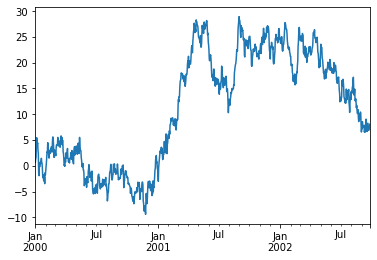

In [92]:
import matplotlib.pyplot as plt
plt.close("all")

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

If running under Jupyter Notebook, the plot will appear on [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas.Series.plot). Otherwise use [`matplotlib.pyplot.show`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) to show it or [`matplotlib.pyplot.savefig`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) to write it to a file.

On a DataFrame, the [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method is a convenience to plot all of the columns with labels:

<Figure size 432x288 with 0 Axes>

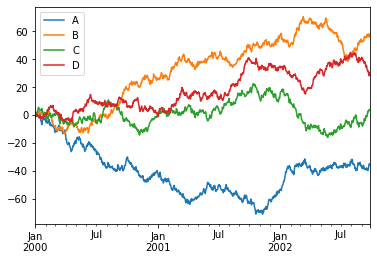

In [93]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

## Importing and exporting data

### CSV

[Writing to a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv): using [`DataFrame.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv)

In [94]:
df.to_csv("foo.csv")

[Reading from a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table): using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)

In [95]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.325755,1.785620,0.170050,-1.634606
1,2000-01-02,1.300756,1.185633,-0.621490,-0.635385
2,2000-01-03,0.437490,1.816847,0.614259,0.120829
3,2000-01-04,0.880101,0.793056,1.371258,0.210003
4,2000-01-05,0.238133,0.183308,0.932891,0.628865
...,...,...,...,...,...
995,2002-09-22,-36.300508,56.270354,3.018058,29.786424
996,2002-09-23,-35.312066,56.012029,4.010364,28.200179
997,2002-09-24,-35.128091,56.950150,3.898657,29.374028
998,2002-09-25,-35.756951,58.222894,3.756575,30.679561


### Excel

Reading and writing to [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file using [`DataFrame.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel):

In [96]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel):

In [97]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.325755,1.785620,0.170050,-1.634606
1,2000-01-02,1.300756,1.185633,-0.621490,-0.635385
2,2000-01-03,0.437490,1.816847,0.614259,0.120829
3,2000-01-04,0.880101,0.793056,1.371258,0.210003
4,2000-01-05,0.238133,0.183308,0.932891,0.628865
...,...,...,...,...,...
995,2002-09-22,-36.300508,56.270354,3.018058,29.786424
996,2002-09-23,-35.312066,56.012029,4.010364,28.200179
997,2002-09-24,-35.128091,56.950150,3.898657,29.374028
998,2002-09-25,-35.756951,58.222894,3.756575,30.679561
